In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [79]:
class Node:
    def __init__(self, points=None, axis=None, left=None, right=None):
        self.points = points
        self.axis = axis
        self.left = left
        self.right = right
        
def build_kd_tree(points, k, depth=0):
    
    axis = random.randint(0, len(points[0]) - 1)
    points.sort(key=lambda x: x[0][axis])  
    
    if len(points) < k:
        return Node(points=points, axis=axis) 
    
    median_index = len(points) // 2
    
    left_points = points[:median_index]
    right_points = points[median_index + 1:]
    
    if len(left_points) < k or len(right_points) < k:
        return Node(points=points, axis=axis)

    left_child = build_kd_tree(left_points, k, depth + 1)
    right_child = build_kd_tree(right_points, k, depth + 1)
    
    return Node(points=points, axis=axis, left=left_child, right=right_child)

def pairwise_dist(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def find_leaf_node(root, query_point):
    node = root
    while node.left or node.right:
        if query_point[0][node.axis] < node.points[len(node.points) // 2][0][node.axis]:
            node = node.left
        else:
            node = node.right
    return node

def find_k_nearest_neighbors(node, query_point, k):
    points = node.points
    
    distances = [(point, pairwise_dist(point[0], query_point[0])) for point in points]
    
    distances.sort(key=lambda x: x[1])
    a= [distances[i][0] for i in range(min(k, len(distances)))]
    return a


def predict_class(neighbors):
   lables = [point[-1] for point in neighbors]
   return max(set(lables), key=lables.count)

In [80]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=5, random_state=42)

A = []
for i in range(len(X)):
    A.append((X[i],y[i]))

In [81]:
np.random.seed(42)
k = 5
query_pt = np.array([0, 8.82,])
query_pt = (query_pt, 1)

root = build_kd_tree(A, k)

leaf_node = find_leaf_node(root, query_pt)

nearest_neighbors = find_k_nearest_neighbors(leaf_node, query_pt, k)

print("Query Point:", query_pt)
print("K Nearest Neighbors:", nearest_neighbors)

Query Point: (array([0.  , 8.82]), 1)
K Nearest Neighbors: [(array([-0.62301172,  9.18886394]), 0), (array([-1.04354885,  8.78850983]), 0), (array([-1.03130358,  8.49601591]), 0), (array([-1.35060204,  8.19360381]), 0), (array([-1.59379551,  9.34303724]), 0)]


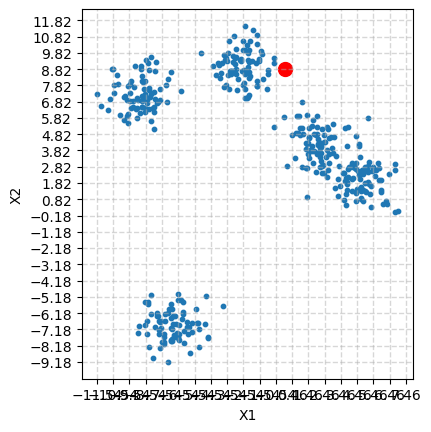

In [82]:
def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
    
    plt.scatter(query_pt[0][0], query_pt[0][1], color='red', s=100)
    

plot_dataset()

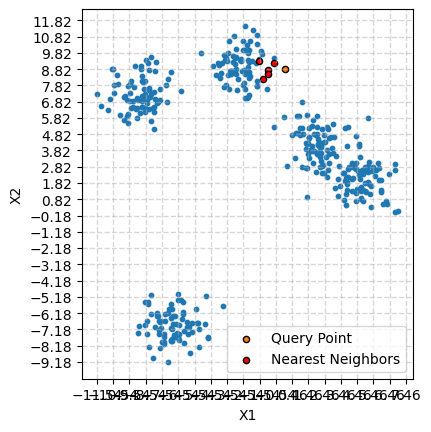

In [83]:
def plot_dataset(X, query_pt, nearest_neighbors=None):
    plt.scatter(X[:, 0], X[:, 1], s=10, )
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
    
    plt.scatter(query_pt[0][0], query_pt[0][1], s=20, label='Query Point', edgecolors='black' )
    
    if nearest_neighbors is not None:
        nn_points = np.array(nearest_neighbors)
        plt.scatter(nn_points[:, 0], nn_points[:, 1], color = 'red', s=20, label='Nearest Neighbors', edgecolors='black')
    
    plt.legend()
    plt.show()
    
npp = [p[0] for p in nearest_neighbors]
npp = np.array(npp)
plot_dataset(X, query_pt, npp)

In [84]:
import pandas as pd

# Telecommunications dataset
data = pd.read_csv('teleCust1000t.csv')
y=data['custcat']
X=data.drop(['custcat'],axis=1)
X=X.to_numpy()
y=y.to_numpy()

A = []
for i in range(len(X)):
    A.append((X[i],y[i]))

In [85]:
import time 
import tracemalloc
start_time = time.time()
tracemalloc.start()
root=build_kd_tree(A, 5)
train_end_time = time.time()


print("Memory usage: ", tracemalloc.get_traced_memory()[1], "bytes")
tracemalloc.stop()
y_pred = []
for i in range(len(A)):
    leaf_node = find_leaf_node(root, A[i])
    nearest_neighbors = find_k_nearest_neighbors(leaf_node, A[i], 5)
    y_pred.append(predict_class(nearest_neighbors))

test_end_time = time.time()
y_true= [point[-1] for point in A]
y_pred = np.array(y_pred)
y_true = np.array(y_true)
print("Accuracy: ", np.mean(y_pred == y_true))
print("Training time: ", train_end_time - start_time)
print("Testing time: ", test_end_time - train_end_time)

Memory usage:  115108 bytes
Accuracy:  0.364
Training time:  0.011236906051635742
Testing time:  0.10003256797790527


In [86]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=5, random_state=42)

A = []
for i in range(len(X)):
    A.append((X[i],y[i]))

Accuracy:  0.9325


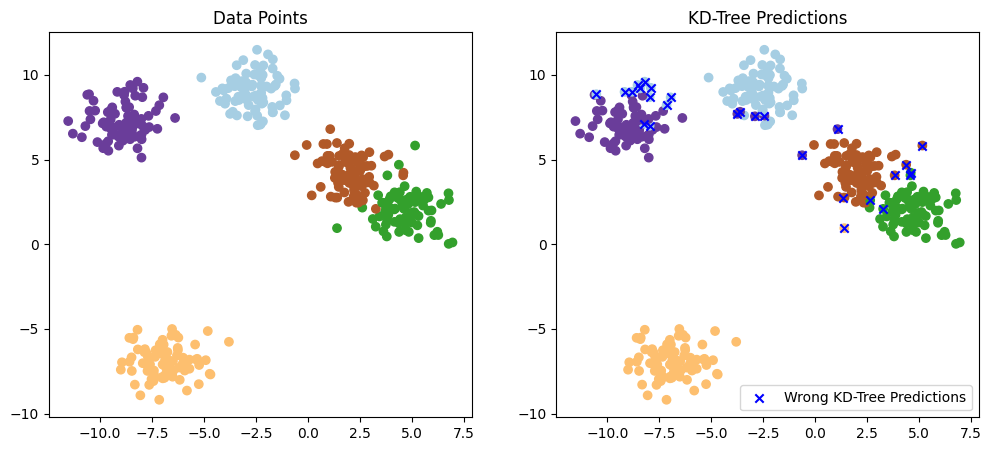

In [87]:
root=build_kd_tree(A, 5)
y_pred = []
for i in range(len(A)):
    leaf_node = find_leaf_node(root, A[i])
    nearest_neighbors = find_k_nearest_neighbors(leaf_node, A[i], 5)
    y_pred.append(predict_class(nearest_neighbors))
plt.figure(figsize=(12, 5))
y_true= [point[-1] for point in A]
X = np.array([point[0] for point in A])

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=plt.cm.Paired)
plt.title("Data Points")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Paired)
plt.title("KD-Tree Predictions")

y_true = np.array(y_true)
y_pred = np.array(y_pred)
accuracy = np.mean(y_true == y_pred)
print("Accuracy: ", accuracy)

wrong_lsh = X[y_true != y_pred]
plt.scatter(wrong_lsh[:, 0], wrong_lsh[:, 1], c='blue', marker='x', label='Wrong KD-Tree Predictions')

plt.legend()
plt.show()

In [88]:
# generate synthetic data
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import numpy as np
query_time=[]
memory_usage=[]
train_time=[]    
acc = []

for dataset_size in [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]:
    print("Dataset size:", dataset_size)
    X, y = make_classification(n_samples=dataset_size, n_features=100, n_informative=10, n_redundant=10, n_clusters_per_class=2)
    A = []
    for i in range(len(X)):
        A.append((X[i],y[i]))
    start_time = time.time()
    
    tracemalloc.start()
    
    kd_tree=build_kd_tree(A, 5)
    
    memory_usage.append(tracemalloc.get_traced_memory()[1])
    
    tracemalloc.stop()
    
    end_time = time.time()
    train_time.append(end_time - start_time)
    
    #select 100 points randomly foar testing
    random_indices = np.random.choice(len(A),200, replace=False)
    test_elements = []
    for i in random_indices:
        test_elements.append(A[i])
    y_pred = []
    y_true= [point[-1] for point in test_elements]
    y_true = np.array(y_true)
    
    start_time = time.time()
    
    for i in range(len(test_elements)):
        leaf_node = find_leaf_node(kd_tree, test_elements[i])
        knn=find_k_nearest_neighbors(leaf_node, test_elements[i], 5)
        y_pred.append(predict_class(knn))
    y_pred=np.array(y_pred)
    accuracy_s = accuracy_score(y_true, y_pred)
    acc.append(accuracy_s)
    end_time = time.time()
    query_time.append(end_time - start_time)

df = pd.DataFrame({'Dataset Size': [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000], 'Query Time': query_time, 'Memory Usage': memory_usage, 'Train Time': train_time, 'Accuracy': acc})
print(df)

Dataset size: 1000
Dataset size: 2000
Dataset size: 5000
Dataset size: 10000
Dataset size: 20000
Dataset size: 50000
Dataset size: 100000
Dataset size: 200000
Dataset size: 500000
Dataset size: 1000000
   Dataset Size  Query Time  Memory Usage  Train Time  Accuracy
0          1000    0.033028        103700    0.011901     0.770
1          2000    0.018002        221500    0.046001     0.690
2          5000    0.033003        555428    0.061962     0.685
3         10000    0.022971       1200412    0.135030     0.670
4         20000    0.028004       2718852    0.925400     0.710
5         50000    0.019002       8468068    1.905298     0.675
6        100000    0.024002      17744764    3.105928     0.650
7        200000    0.028960      37098836    7.652629     0.720
8        500000    0.041960      90207916   20.059400     0.690
9       1000000    0.066039     188437756   46.612267     0.695


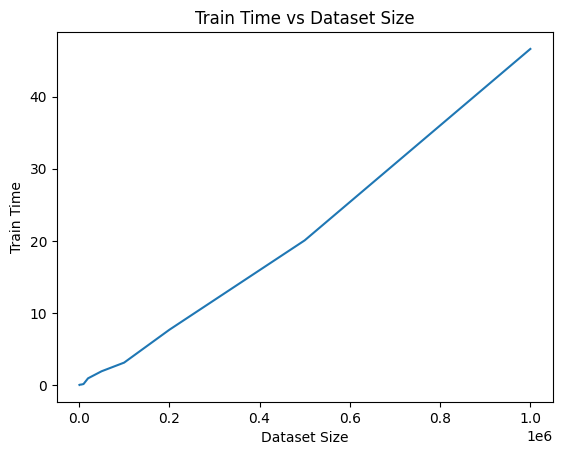

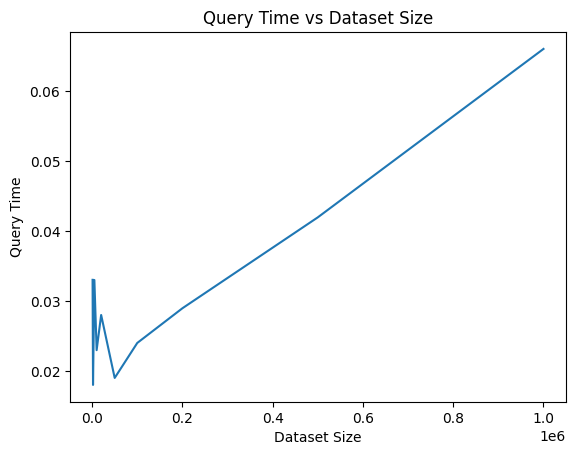

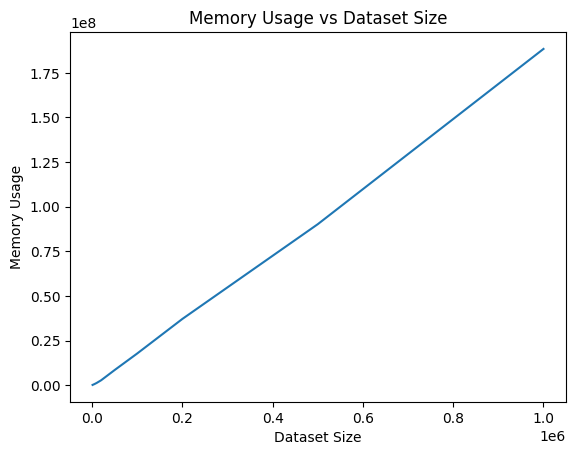

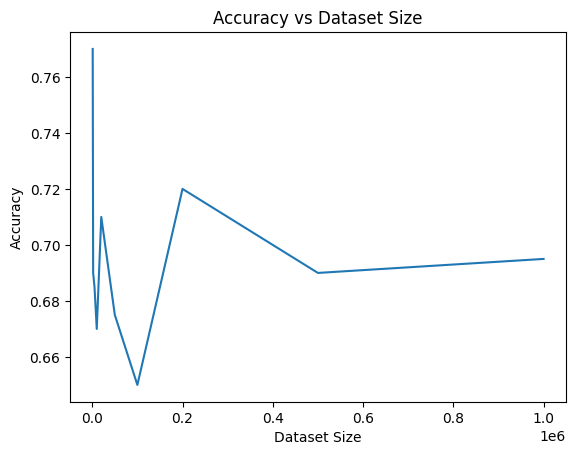

In [89]:
#graph for train time vs dataset size
plt.plot(df['Dataset Size'], df['Train Time'])
plt.xlabel('Dataset Size')
plt.ylabel('Train Time')
plt.title('Train Time vs Dataset Size')
plt.show()
#graph for query time vs dataset size
plt.plot(df['Dataset Size'], df['Query Time'])
plt.xlabel('Dataset Size')
plt.ylabel('Query Time')
plt.title('Query Time vs Dataset Size')
plt.show()
#graph for memory usage vs dataset size
plt.plot(df['Dataset Size'], df['Memory Usage'])
plt.xlabel('Dataset Size')
plt.ylabel('Memory Usage')
plt.title('Memory Usage vs Dataset Size')
plt.show()
#graph for accuracy vs dataset size
plt.plot(df['Dataset Size'], df['Accuracy'])
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Dataset Size')
plt.show()

In [90]:
# generate synthetic data
from sklearn.datasets import make_classification
import numpy as np
query_time=[]
memory_usage=[]
train_time=[]
acc=[]
for d in [2,5,10,20,50,100,200,500,1000,2000,5000,10000]:
    print("Dimension :", d)
    X, y = make_classification(n_samples=1000, n_features=d, n_informative=1, n_redundant=1, n_clusters_per_class=1)
    
    A = []
    for i in range(len(X)):
        A.append((X[i],y[i]))
    start_time = time.time()
    tracemalloc.start()

    kd_tree=build_kd_tree(A, 5)
    memory_usage.append(tracemalloc.get_traced_memory()[1])
    tracemalloc.stop()
    
    end_time = time.time()
    train_time.append(end_time - start_time)
    
    #select 100 points randomly foar testing
    random_indices = np.random.choice(len(A), 100, replace=False)
    test_elements = []
    for i in random_indices:
        test_elements.append(A[i])
    y_pred = []
    y_true= [point[-1] for point in test_elements]
    y_true = np.array(y_true).astype(int)
    start_time = time.time()
    
    for i in range(len(test_elements)):
        leaf_node = find_leaf_node(kd_tree, test_elements[i])
        knn=find_k_nearest_neighbors(leaf_node, test_elements[i], 5)
        y_pred.append(predict_class(knn))

    y_pred = np.array(y_pred).astype(int)
    accuracy_s = accuracy_score(y_true, y_pred)
    acc.append(accuracy_s)
    
    end_time = time.time()
    query_time.append(end_time - start_time)
    

df = pd.DataFrame({'Dimensions': [2,5,10,20,50,100,200,500,1000,2000,5000,10000], 'Query Time': query_time, 'Memory Usage': memory_usage, 'Train Time': train_time, 'accuracy': acc})
print(df)

Dimension : 2
Dimension : 5
Dimension : 10
Dimension : 20
Dimension : 50
Dimension : 100
Dimension : 200
Dimension : 500
Dimension : 1000
Dimension : 2000
Dimension : 5000
Dimension : 10000
    Dimensions  Query Time  Memory Usage  Train Time  accuracy
0            2    0.083998        105823    1.671060      0.99
1            5    0.012002         97876    0.011996      0.81
2           10    0.008029         97756    0.013016      0.83
3           20    0.009031         97756    0.009995      0.75
4           50    0.008001         97756    0.011001      0.64
5          100    0.009003         97756    0.007999      0.70
6          200    0.010999         97756    0.010962      0.65
7          500    0.010964         97756    0.010035      0.68
8         1000    0.012005         97756    0.012027      0.67
9         2000    0.013999         97820    0.026110      0.67
10        5000    0.021042         97756    0.010996      0.72
11       10000    0.049995         97756    0.011004  

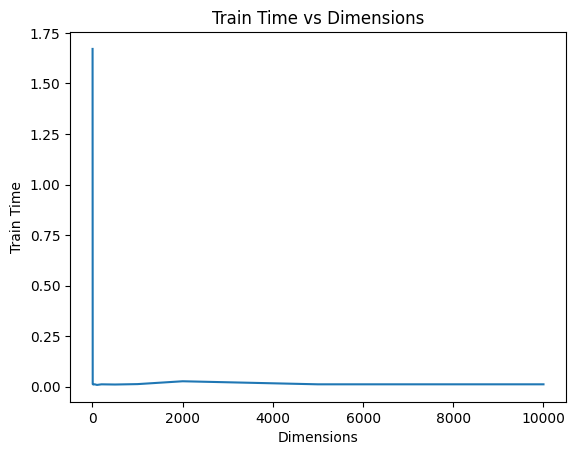

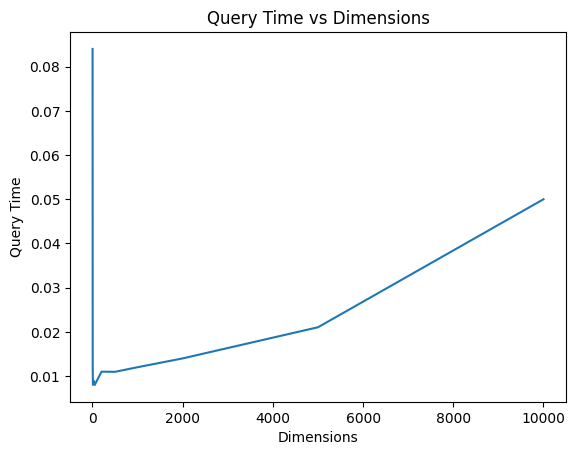

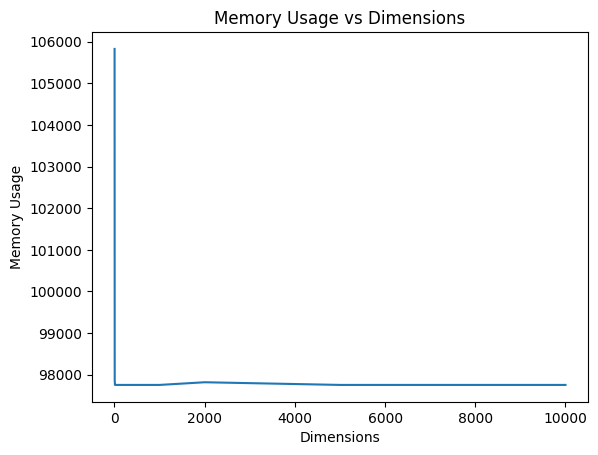

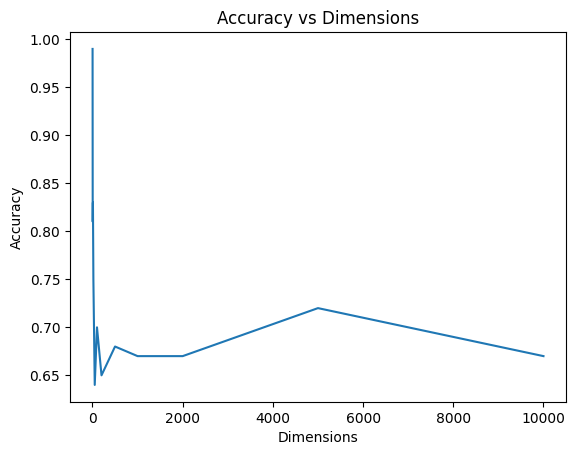

In [91]:
#graph for train time vs dimensions
plt.plot(df['Dimensions'], df['Train Time'])
plt.xlabel('Dimensions')
plt.ylabel('Train Time')
plt.title('Train Time vs Dimensions')
plt.show()

#graph for query time vs dimensions
plt.plot(df['Dimensions'], df['Query Time'])
plt.xlabel('Dimensions')
plt.ylabel('Query Time')
plt.title('Query Time vs Dimensions')
plt.show()

#graph for memory usage vs dimensions
plt.plot(df['Dimensions'], df['Memory Usage'])
plt.xlabel('Dimensions')
plt.ylabel('Memory Usage')
plt.title('Memory Usage vs Dimensions')
plt.show()

#graph for accuracy vs dimensions
plt.plot(df['Dimensions'], df['accuracy'])
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Dimensions')
plt.show()

In [100]:
class naive_KNN:
    def __init__(self, k,X,y):
        self.k = k
        self.dataset = [(X[i], y[i]) for i in range(len(X))]
    def predict(self, x):
        distances = []
        for i in range(len(self.dataset)):
            distances.append((i, self.distance(x, self.dataset[i][0])))
        distances.sort(key=lambda x: x[1])
        k_nearest = distances[:self.k]
        return self.majority_vote(k_nearest)
    def k_nearest(self, x):
        distances = []
        for i in range(len(self.dataset)):
            distances.append((i, self.distance(x, self.dataset[i][0])))
        distances.sort(key=lambda x: x[1])
        k_nearest = distances[:self.k]
        return k_nearest
    def distance(self, x1, x2):
        return sum((x1[i] - x2[i])**2 for i in range(len(x1)))**0.5
    def majority_vote(self, k_nearest):
        votes = {}
        for i in range(len(k_nearest)):
            label = self.dataset[k_nearest[i][0]][1]
            if label in votes:
                votes[label] += 1
            else:
                votes[label] = 1
        return max(votes, key=votes.get)
    def score(self, test_data):
        correct = 0
        for x, y in test_data:
            if self.predict(x) == y:
                correct += 1
        return correct / len(test_data)

In [101]:
X, y = make_blobs(n_samples=400, centers=5, random_state=42)
i=399
naive_knn=naive_KNN(5,X,y)
q = np.array([-2.5, 0])

dis=naive_knn.k_nearest(q)

q = (q, 1)

A = []
for i in range(len(X)):
    A.append((X[i],y[i]))
k=5
query_pt=(X[i],y[i])
root = build_kd_tree(A, k)
leaf_node = find_leaf_node(root, q)
nearest_neighbors = find_k_nearest_neighbors(leaf_node, q, k)

In [102]:
print(X[i])

[-5.42848358 -5.92083877]


In [103]:
dis

[(143, 3.936400203258282),
 (55, 4.012400648284739),
 (368, 4.56596906522125),
 (135, 4.5990099556323925),
 (311, 4.706989222798834)]

In [104]:
naive_knn_neighbors = [naive_knn.dataset[dis[i][0]] for i in range(5)]
print(naive_knn_neighbors)

[(array([0.181426  , 2.88187459]), 4), (array([1.3986115 , 0.94878204]), 1), (array([1.09906699, 2.80976695]), 4), (array([0.61478854, 3.38363487]), 4), (array([1.31795654, 2.75299026]), 4)]


In [105]:
nearest_neighbors

[(array([-4.81887927, -5.12476875]), 2),
 (array([3.79308512, 0.45832246]), 1),
 (array([-6.53787122, -5.00393875]), 2),
 (array([-6.36028068, -5.34737068]), 2),
 (array([4.38731068, 0.7253865 ]), 1)]

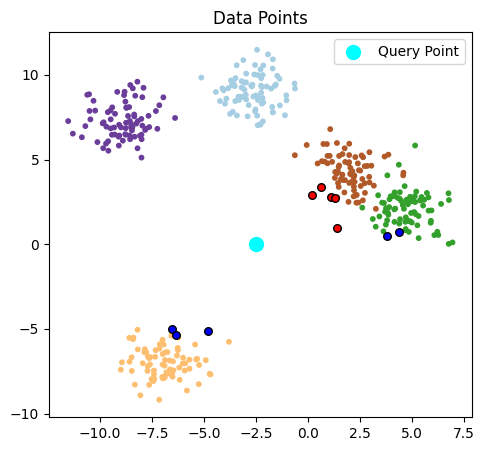

In [106]:
plt.figure(figsize=(12, 5))

# Plot for exact KNN
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired,s=10)
plt.title("Data Points")


plt.scatter(q[0][0], q[0][1], c='cyan', label='Query Point', s=100)
for ind in dis:
    plt.scatter(X[ind[0]][0], X[ind[0]][1], c='red', label='',s=30, edgecolors='black')
for ind in nearest_neighbors:
    # print(ind[0][0])
    plt.scatter(ind[0][0], ind[0][1], c='blue', label='',s=30, edgecolors='black')

plt.legend()
plt.show()

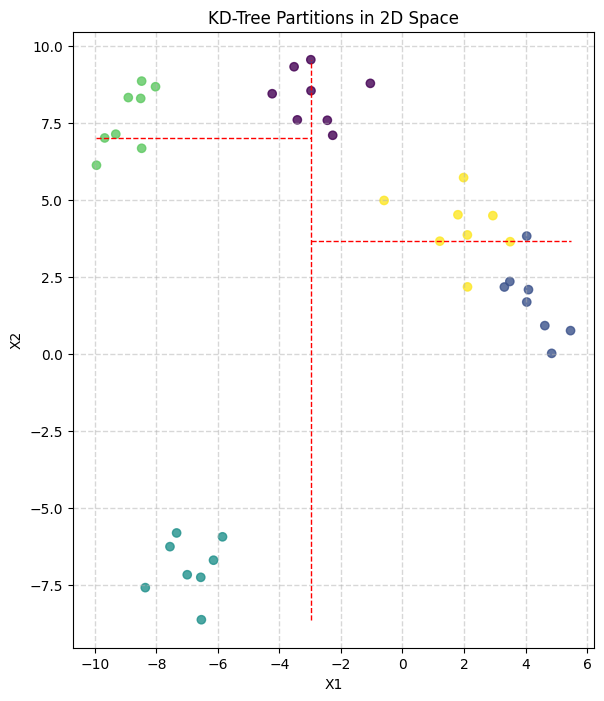

In [107]:
def visualize_kd_tree_partitions(node, xmin, xmax, ymin, ymax):
    if not node:
        return
    
    if node.left is None and node.right is None:
        return
    
    if node.axis == 0:
        plt.plot([node.points[len(node.points) // 2][0][0], node.points[len(node.points) // 2][0][0]], [ymin, ymax], color='r', linestyle='--', linewidth=1)
        visualize_kd_tree_partitions(node.left, xmin, node.points[len(node.points) // 2][0][0], ymin, ymax)
        visualize_kd_tree_partitions(node.right, node.points[len(node.points) // 2][0][0], xmax, ymin, ymax)
    else:
        plt.plot([xmin, xmax], [node.points[len(node.points) // 2][0][1], node.points[len(node.points) // 2][0][1]], color='r', linestyle='--', linewidth=1)
        visualize_kd_tree_partitions(node.left, xmin, xmax, ymin, node.points[len(node.points) // 2][0][1])
        visualize_kd_tree_partitions(node.right, xmin, xmax, node.points[len(node.points) // 2][0][1], ymax)

np.random.seed(42)
X, y = make_blobs(n_samples=40, centers=5, random_state=42)

points_with_labels = [(X[i], y[i]) for i in range(len(X))]


root = build_kd_tree(points_with_labels, k)

xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.title("KD-Tree Partitions in 2D Space")

visualize_kd_tree_partitions(root, xmin, xmax, ymin, ymax)

plt.xlabel('X1')
plt.ylabel('X2')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
plt.show()


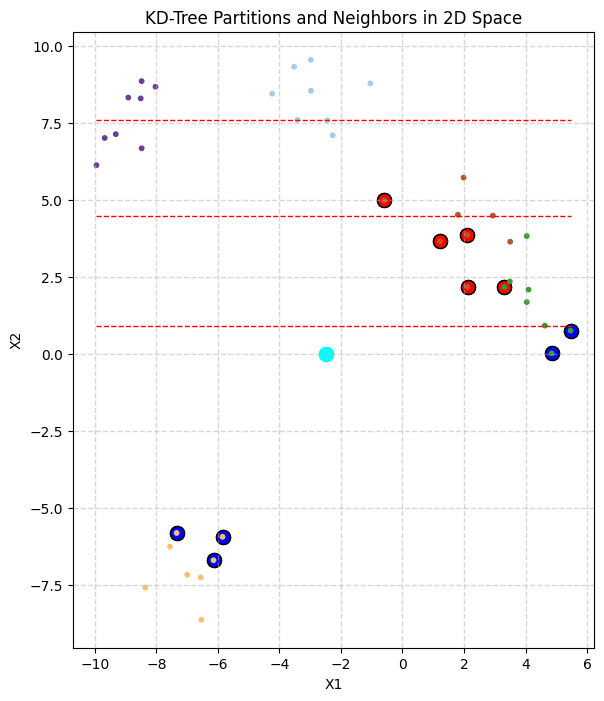

In [124]:
def visualize_kd_tree_partitions_with_neighbors(node, xmin, xmax, ymin, ymax, query_point, naive_neighbors, kd_neighbors):
    if not node:
        return
    
    if node.left is None and node.right is None:
        return
    
    if node.axis == 0:
        plt.plot([node.points[len(node.points) // 2][0][0], node.points[len(node.points) // 2][0][0]], [ymin, ymax], color='r', linestyle='--', linewidth=1)
        visualize_kd_tree_partitions_with_neighbors(node.left, xmin, node.points[len(node.points) // 2][0][0], ymin, ymax, query_point, naive_neighbors, kd_neighbors)
        visualize_kd_tree_partitions_with_neighbors(node.right, node.points[len(node.points) // 2][0][0], xmax, ymin, ymax, query_point, naive_neighbors, kd_neighbors)
    else:
        plt.plot([xmin, xmax], [node.points[len(node.points) // 2][0][1], node.points[len(node.points) // 2][0][1]], color='r', linestyle='--', linewidth=1)
        visualize_kd_tree_partitions_with_neighbors(node.left, xmin, xmax, ymin, node.points[len(node.points) // 2][0][1], query_point, naive_neighbors, kd_neighbors)
        visualize_kd_tree_partitions_with_neighbors(node.right, xmin, xmax, node.points[len(node.points) // 2][0][1], ymax, query_point, naive_neighbors, kd_neighbors)

    plt.scatter(query_point[0][0], query_point[0][1], c='cyan', label='Query Point', s=100)

    for ind in kd_neighbors:
        plt.scatter(ind[0][0], ind[0][1], c='blue', label='KD-Tree Neighbor', s=100, edgecolors='black')

    for ind in naive_neighbors:
        plt.scatter(ind[0][0], ind[0][1], c='red', label='Naive KNN Neighbor', s=100, edgecolors='black')

np.random.seed(42)
X, y = make_blobs(n_samples=40, centers=5, random_state=42)

points_with_labels = [(X[i], y[i]) for i in range(len(X))]

k = 5

root = build_kd_tree(points_with_labels, k)

naive_knn=naive_KNN(5,X,y)
q = np.array([-2.5, 0])

dis=naive_knn.k_nearest(q)

naive_neighbors = [naive_knn.dataset[dis[i][0]] for i in range(5)]

query_pt = (q, 1)

leaf_node = find_leaf_node(root, query_pt)
kd_neighbors = find_k_nearest_neighbors(leaf_node, query_pt, k)

xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])

plt.figure(figsize=(12, 8))

visualize_kd_tree_partitions_with_neighbors(root, xmin, xmax, ymin, ymax, query_pt, naive_neighbors, kd_neighbors)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=10)
plt.title("KD-Tree Partitions and Neighbors in 2D Space")
plt.xlabel('X1')
plt.ylabel('X2')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)

plt.show()